<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/Breast_Cancer_Prediction_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📥 Step 1: Load the Dataset

In [ ]:
import pandas as pd
df=pd.read_csv('Cancer_Data.csv')

## 🔍 Step 2: Explore the Dataset

In [ ]:
df.head()#displaying few rows


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


33 columns

In [ ]:
#understanding info and shape of dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 33)

dtypes: float64(31), int64(1), object(1)
memory usage: 146.8+ KB
(569, 33)
1 column with datatype "object"
31 columns with datatype "float"
1column with datatype "integer"
rows 0-568
columns 33

In [ ]:
#checking missing values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


the intial steps of exploring data is to undrstand the structure and quality of data

Post exploration steps

## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [ ]:
#checking missing values
print(df.isnull().sum())



id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#removing duplicate rows
df=df.drop_duplicates()
print(df.drop_duplicates())

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
#checking and removing empty/constant columns
df=df.loc[:, (df !=df.iloc[0]).any()]
print(df.loc[:, (df !=df.iloc[0]).any()])

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

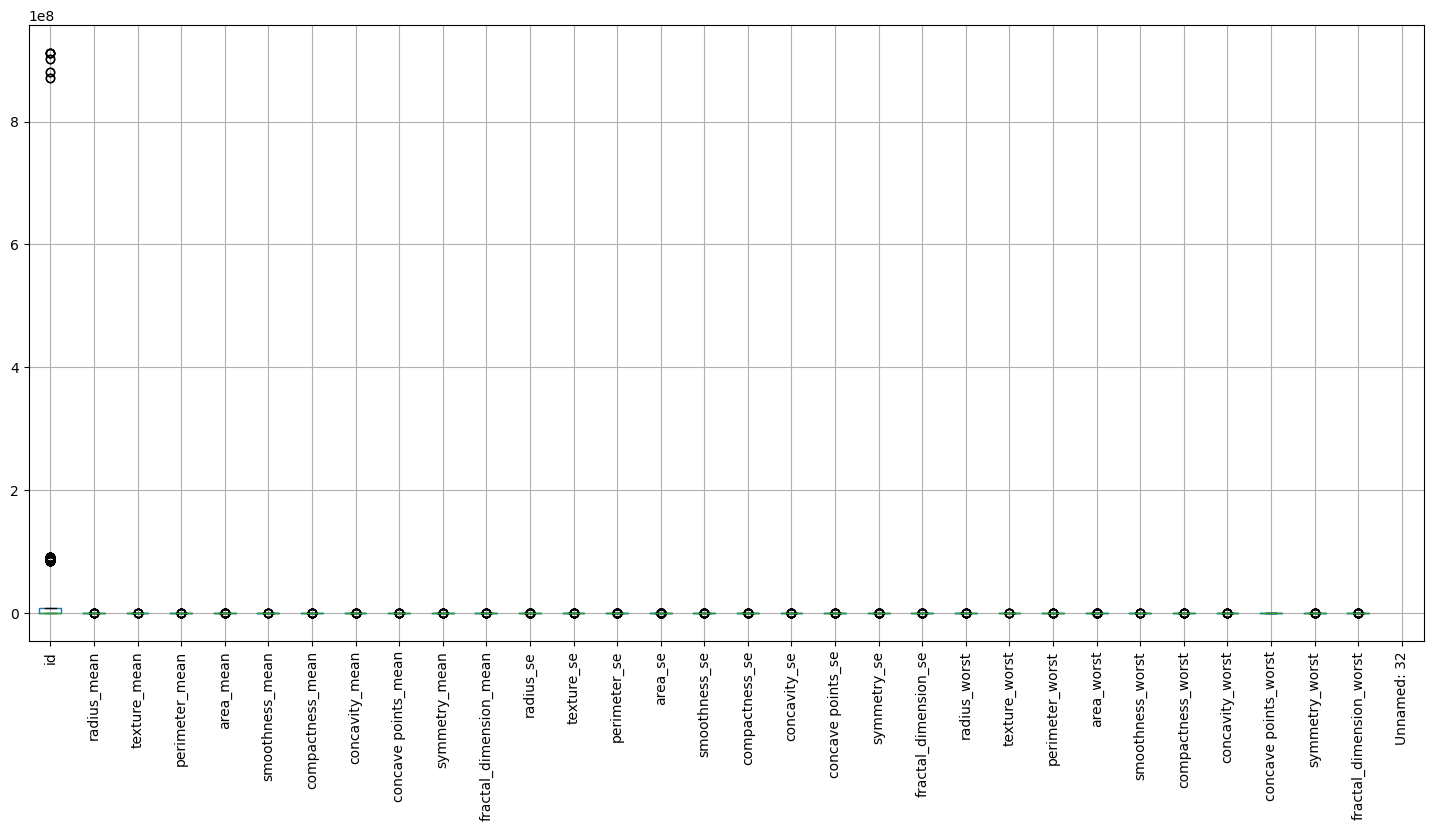

In [ ]:
#inspecting outliers with boxplot(visualizing/cleaning)
import matplotlib.pyplot as plt
df.boxplot(rot=90,figsize=(18,8))
plt.show()


figsize=(18,8) sets the figure size of plot in inches- here the plot is 18 inches wide and 8inches tall
rot=90 rotates x axis tick labels to 90 degrees(to make visualization more readable on screen-so, basically using it to customize our box plot as we have large number of columns to plot)

##SO THE KEY OBSERVATIONS HERE ARE
###Extremely large values in the id featurewhich makes it stand out shaply compared to othr columns in dataframe
###All other columns look almost flattened near zero, making it hard to distinguish any variation, becuase of the scale is skewed by the large values of id feature
###Outliers detection not possible here
#so
#***next we drop id column***
id is not rlevant for prediction in the given context hence rmoving it will help draw meaningful visualization



In [ ]:
#confirming presnt columns
print(df.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


## 📊 Step 4: Visualize the Data

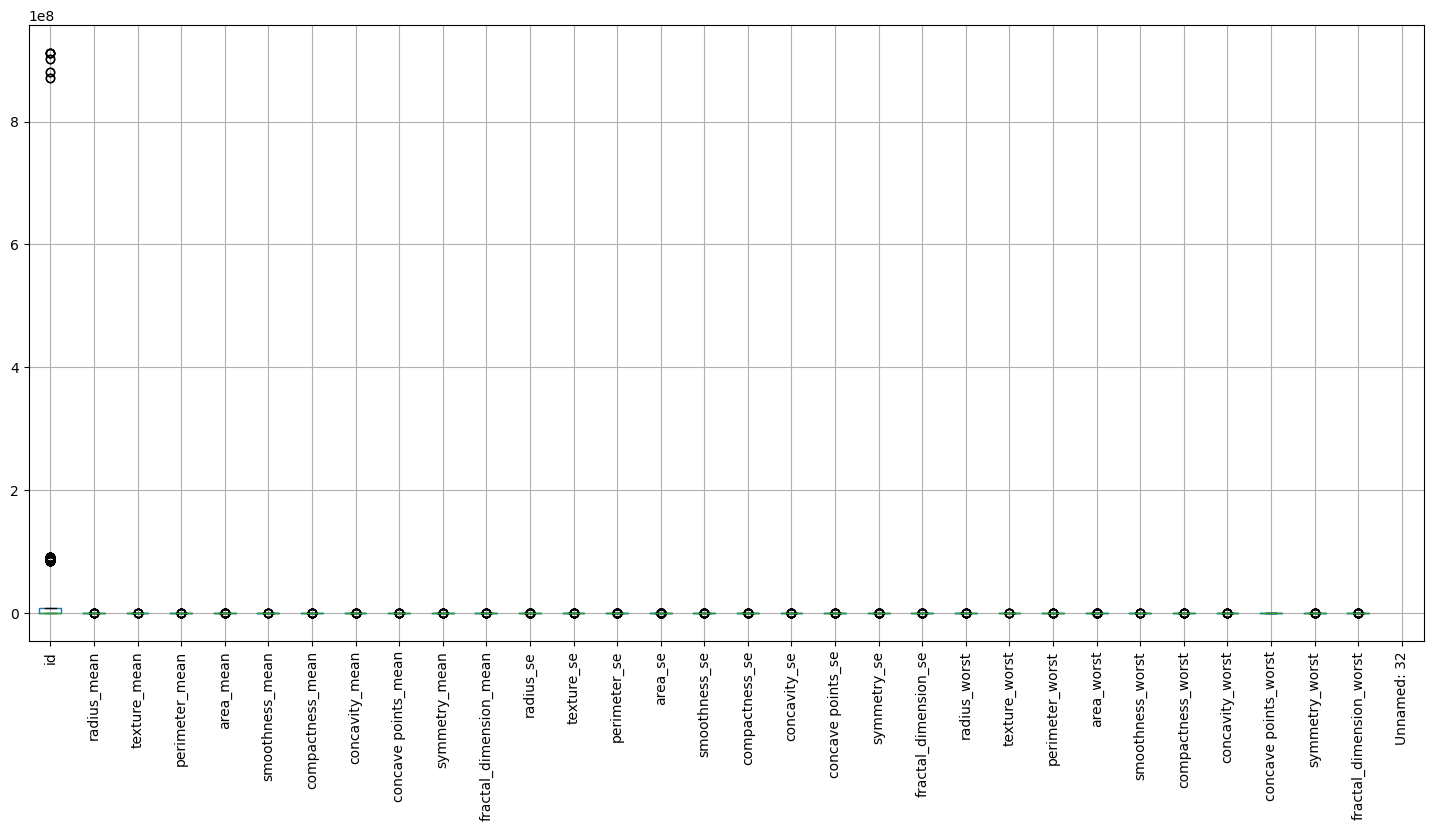

In [ ]:
#lets replot the boxplot for visualization as we have cleaned the data now
import matplotlib.pyplot as plt
df.boxplot(rot=90,figsize=(18,8))
plt.show()


removed irrelevant data and cleaned our data so it is ready to visualize


In [ ]:
#lets do a final check on cleanliness of data
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df.duplicated().sum()

np.int64(0)

##df.isnull().sum() giving zero
(means there aare no missing values in relevant columns id column being irrelevant)
##df.duplicated().sum()
(means duplicate rows have been deleted)
#so clean and good to go


## ⚙️ Step 5: Preprocess the Data

In [ ]:
# Convert diagnosis column to 0 (benign) and 1 (malignant)
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
#to make the labels B nad M to a more machine comprehendable with 0 and 1, respectively)

# Split features and labels
x=df.drop('diagnosis',axis=1) #assigning x to all columns except "diagnosis", these are features or inputs to the model
y=df['diagnosis']             #assigning y to "diagnosis" column which is now numeric and the target/output/prediction

# Split into training and testing sets
from sklearn.model_selection import train_test_split   #this is splitting the dataset into train/fit data(train data x,train data y) and test/evaluation data(test data x,test data y)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)  #test_size 0.2 means 20% of data goes to test and rest to train
#random_ 42 is to ensure split is reproducible each time the code is run


# Scale the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  #is to scale/standardize our feature data so that each column has a mean of 0 and a standard deviation of 1
x_train=scaler.fit_transform(x_train)              #fit_transform is used on training data
x_test=scaler.transform(x_test)                    #.transform is used on test data #using only traing data's scaling paramter


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
#seems there is at least one column in our features(x) with all identical values or constant column or possibly only zeroes, let's check
constant_columns=[col for col in x.columns if x[col].nunique()==1]
print("Constant_columns:",constant_columns)
x.drop(constant_columns,axis=1)

Constant_columns: []


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 32)
(114, 32)
(455,)
(114,)


scaling or standrdization is important for ML algorithms to work best when feature be on similar scale

print(x_train.shape)(455, 32)
print(x_test.shape)(114, 32)
print(y_train.shape)(455,)
print(y_test.shape)(114,)
So the data is processed and splitted perfectly
now we have 455 training samples with 32 features each
now we have 114 testing samples with 32 features each

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
import numpy as np
nan_train = np.isnan(x_train).any()
nan_test = np.isnan(x_test).any()
print(nan_train)
print(nan_test)

False
False


false means we are eady to fit the model as we have successfully  imputed and dropped

## 🤖 Step 6: Train a Machine Learning Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

## 🧪 Step 7: Evaluate the Model

In [ ]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9736842105263158


an accuracy of 97.4% means that the logistic regression model correctly predicted whether a sample is benign or malign for about 97 out of 100 test examples
its a high accuracy indicating the model performsvery well on the given breast cancer dataset.
However for a more robust assessment lets review the confusion matrix and classification report to ensure that both classes prdicted well and to check any potential issue such as false negatives or class imbalance

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,y_pred)
print("Accuracy:",accuracy)
print("Confusion Matrix:",confusion)
print("Classification Report:",classification_report(y_test,y_pred))

Accuracy: 0.9736842105263158
Confusion Matrix: [[70  1]
 [ 2 41]]
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##Model performance explanation
###Accuracy: 97% -the model corrctly classified 97 out of 100 test samples
###Confusion Matrix: [[70 1]]
                     [[2 41]]
  TN 70 FP 1
  FN 2  TP 41
#Classification Report
Precision(Class 1)- when the model predicts cancer, its correct 98% of times
Recall(Class 1)- The model catches 95% of the actual positive(cancer) cases, missing 2 out of 43
F1-Score- Both Classes have an F1 above 0.96, indicating great overall balance between precision and recall.
Support-71 benign, 43 malignant samples in test set

So,
*the accuracy  is high  and strong scores on all metrics suggest our logistic regrsesion model  is reliable for this data set
*very few false negatives (missed values) and false positives(bnign marked as malignant) suggest minimal criticak errors.
*Recall for positives is crucial for Medical applications, our recall is 95%,
that is strong But, in real clinical use(deployment) any missed case should be further reviewed
